<a href="https://colab.research.google.com/github/AmirJlr/nlp-class/blob/master/my_homeworks/HW1/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import requests
import re
import nltk
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# Project Gutenberg's The Problems of Philosophy, by Bertrand Russell

Problems_Philosophy = 'http://www.gutenberg.org/cache/epub/5827/pg5827.txt'
Bertrand = requests.get(Problems_Philosophy)

In [4]:
print('\n')
print('Status code :', str(Bertrand.status_code))
print('------------------------------------')
print(f"Len is {len(Bertrand.text)}")
print('------------------------------------')




Status code : 200
------------------------------------
Len is 269460
------------------------------------


# Part 1: Regular Expressions

In [5]:
text_Bertrand = Bertrand.text
expression = 'philosophy'

In [6]:
results = re.search(expression, text_Bertrand)

In [7]:
print('\n')
print('--------------------------------------------------------')
print('Results')
print('--------------------------------------------------------')
print('A match for the search query: "' + results.group() + '"\nwas found at the following character span: ' + str(results.span()))
print('--------------------------------------------------------')
print('\n')



--------------------------------------------------------
Results
--------------------------------------------------------
A match for the search query: "philosophy"
was found at the following character span: (764, 774)
--------------------------------------------------------




In [8]:
result1 =[]

for match in re.finditer(expression, text_Bertrand):
    result1.append(
    {
        'indices':match.span(),
        'exprission':match.group()
    }
)
    
    
print(f"Matches number : {len(result1)}")   

Matches number : 72


In [9]:
result1

[{'indices': (764, 774), 'exprission': 'philosophy'},
 {'indices': (1833, 1843), 'exprission': 'philosophy'},
 {'indices': (1849, 1859), 'exprission': 'philosophy'},
 {'indices': (5109, 5119), 'exprission': 'philosophy'},
 {'indices': (19891, 19901), 'exprission': 'philosophy'},
 {'indices': (21170, 21180), 'exprission': 'philosophy'},
 {'indices': (33483, 33493), 'exprission': 'philosophy'},
 {'indices': (33560, 33570), 'exprission': 'philosophy'},
 {'indices': (33849, 33859), 'exprission': 'philosophy'},
 {'indices': (50321, 50331), 'exprission': 'philosophy'},
 {'indices': (54760, 54770), 'exprission': 'philosophy'},
 {'indices': (103297, 103307), 'exprission': 'philosophy'},
 {'indices': (109118, 109128), 'exprission': 'philosophy'},
 {'indices': (122400, 122410), 'exprission': 'philosophy'},
 {'indices': (122529, 122539), 'exprission': 'philosophy'},
 {'indices': (125952, 125962), 'exprission': 'philosophy'},
 {'indices': (126061, 126071), 'exprission': 'philosophy'},
 {'indices':

In [10]:
expression2 = '(p|P)hilosophy'

result2 =[]
for match in re.finditer(expression2, text_Bertrand):
    result2.append(
    {
        'indices':match.span(),
        'exprission':match.group()
    }
)
    
    
print(f"Matches number : {len(result2)}")  

Matches number : 81


# Learning Exercise 1:
## Worth 1/5 Points
Now I'm curious how Bertrand used these various philosophical terms in his sentences, and how Bertrand's language, more generally, compares to Friedrich Nietzsche and other philosophers. You're going to help me with that!

## A. Download Data
Use Python's requests library to collect Friedrich Nietzsche's book, <a href='http://www.gutenberg.org/cache/epub/4363/pg4363.txt'>Beyond Good and Evil</a> into Python. Collect one additional work of philosophy (of your choice) and import it as well.

In [11]:
Good_and_Evil = 'http://www.gutenberg.org/cache/epub/4363/pg4363.txt'
Nietzsche = requests.get(Good_and_Evil)

In [12]:
text_Nietzsche = Nietzsche.text

In [13]:
expression = '(P|p)hilo(?!nous)[a-z]+'

In [14]:
result_Bertrand =[]
for match in re.finditer(expression, text_Bertrand):
    result_Bertrand.append(
    {
        'indices':match.span(),
        'match':match.group()
    }
)

matches_Bertrand = []; [matches_Bertrand.append(m['match']) for m in result_Bertrand];
    
print(f"Bertrand Matches number : {len(result_Bertrand)}")  

Bertrand Matches number : 151


In [15]:
result_Nietzsche =[]
for match in re.finditer(expression, text_Nietzsche):
    result_Nietzsche.append(
    {
        'indices':match.span(),
        'match':match.group()
    }
)

matches_Nietzsche = []; [matches_Nietzsche.append(m['match']) for m in result_Nietzsche];
    
print(f"Nietzsche Matches number : {len(result_Nietzsche)}")  

Nietzsche Matches number : 221


In [16]:
def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    return freq

In [17]:
print('Bertrand :')
print('\n')
print('--------------------------------------------------------')
print('Results')
print('--------------------------------------------------------')
print('We found ' +  str(len(matches_Bertrand)) + ' matches...\n')
print(str(matches_Bertrand))
print('--------------------------------------------------------')
print('We found ' +  str(len(set(matches_Bertrand))) + ' distinct terms...\n')
print(CountFrequency(matches_Bertrand))
print('--------------------------------------------------------')
print('\n')

Bertrand :


--------------------------------------------------------
Results
--------------------------------------------------------
We found 151 matches...

['Philosophy', 'Philosophy', 'philosophy', 'philosophers', 'philosophy', 'philosophy', 'philosophy', 'philosopher', 'philosopher', 'philosopher', 'philosophers', 'philosophers', 'philosophers', 'philosophers', 'philosophers', 'philosophers', 'Philosophy', 'philosophy', 'philosophy', 'philosopher', 'philosophical', 'Philosophy', 'philosophy', 'philosophers', 'philosophy', 'philosophy', 'philosophical', 'philosopher', 'philosophical', 'philosophers', 'philosophers', 'philosophers', 'philosophers', 'philosophy', 'philosophical', 'philosopher', 'philosophy', 'philosopher', 'philosophy', 'philosopher', 'philosophy', 'philosophers', 'philosophers', 'philosophers', 'philosophers', 'philosopher', 'philosophers', 'philosophy', 'philosophy', 'philosophical', 'philosophers', 'philosophy', 'philosophy', 'philosophers', 'philosophy', 'philos

In [18]:
print('Nietzsche :')
print('\n')
print('--------------------------------------------------------')
print('Results')
print('--------------------------------------------------------')
print('We found ' +  str(len(matches_Nietzsche)) + ' matches...\n')
print(str(matches_Nietzsche))
print('--------------------------------------------------------')
print('We found ' +  str(len(set(matches_Nietzsche))) + ' distinct terms...\n')
print(CountFrequency(matches_Nietzsche))
print('--------------------------------------------------------')
print('\n')

Nietzsche :


--------------------------------------------------------
Results
--------------------------------------------------------
We found 221 matches...

['philosophers', 'philosophy', 'philosophical', 'philosophy', 'philosophy', 'philosophers', 'philosophers', 'philosophers', 'philosophers', 'philosophers', 'philosophical', 'philosopher', 'philosophy', 'philosophers', 'philosophy', 'philosophy', 'philosophy', 'philosopher', 'philosophy', 'philosophy', 'philosophize', 'philologist', 'philosopher', 'philosophers', 'philosophy', 'philosopher', 'philosophy', 'philosophy', 'philosophasters', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosophy', 'philosopher', 'philosopher', 'philosopher', 'philosopher', 'Philosophers', 'philosophers', 'philosophers', 'philosophical', 'philosopher', 'philosophical', 'philosophers', 'philosophies', 'philosophizing', 'philosophizing', 'philosophy', 'philosophical', 'philosophers', 'philosophers', 'philologist

In [29]:
df_Bertrand = pd.DataFrame(CountFrequency(matches_Bertrand), index=[0]).T

In [26]:
df_Nietzsche = pd.DataFrame(CountFrequency(matches_Nietzsche), index=[0]).T

<Axes: >

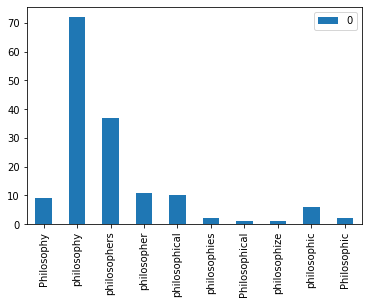

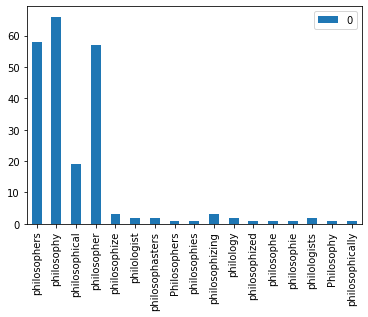

In [31]:

df_Bertrand.plot(kind='bar')

df_Nietzsche.plot(kind='bar')

## B. Basic Text Cleansing
Use re.sub to do some basic text cleansing on books you downloaded. More specifically:

replace the various forms of whitespace that appear (\n,\r,\t etc.) with a single whitespace character.
cast all text to lower case
replace common abbreviations with their full form, for instance: it's with it is
Note that item #3 does not have to be comprehensive, just do a couple common abbreviations to illustrate that you know how to do this.